## <center>KNN Assignment(Zoo)</center>

#### Problem Statement:
<code style="background:lightblue;color:black">To Implement a KNN model to classify the animals in to categorie.</code>

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the data and having a glance at it
zoo=pd.read_csv("zoo.csv")
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


#### Making necessary EDA for the model

In [3]:
#Checking the rows and columns of the dataset
zoo.shape

(101, 18)

In [4]:
#Checking the datatypes of the data and checking if any null values are present
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
#Checking for the statistical report of the data
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
#Dropping the animal name column  since it wont contribute to the model accuracy
zoo.drop(['animal name'],axis=1,inplace=True)

<AxesSubplot:ylabel='Count'>

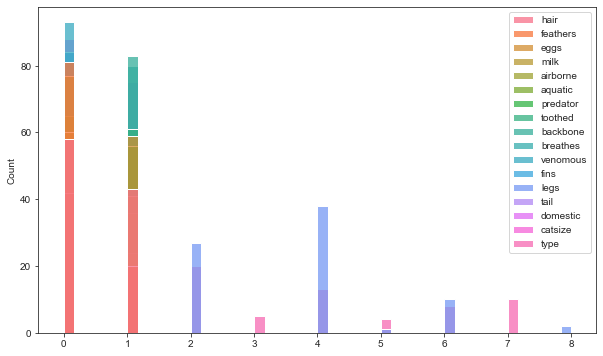

In [7]:
#Plotting the graph for the zoo data
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.histplot(data=zoo)

#### Building the KNN Model 
#### <code style="background:salmon;color:black">Building the KNN model and finding the best k value with the help of Grid Search</code>

In [8]:
#Assigning the independent and dependent variable for the train and test process
x=zoo.iloc[:,:16].values
y=zoo.iloc[:,16].values

In [9]:
#Splitting the data into train and test with 20% data for testing and 80% for training
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [10]:
#Building a KNN Model with 7 neighbors 
model=KNeighborsClassifier(n_neighbors=7)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [11]:
#Predicting the built model on test dataset and cjhecking its accuracy
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8095238095238095

In [12]:
#Finding the best neighbor value for the model in the range 1-40
model=KNeighborsClassifier()
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [13]:
#Finding the best parameters for the KNN model with the help of Gridsearch
gsv=GridSearchCV(model,param_grid=param_grid)
gsv.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [14]:
#checking the neighbor value and the accuracy
print((gsv.best_params_),(gsv.best_score_))

{'n_neighbors': 1} 0.975


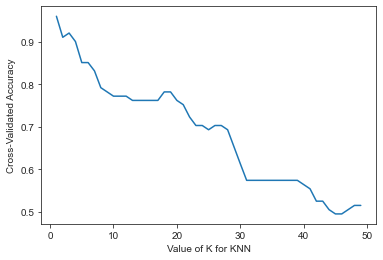

In [15]:
#Plotting and visualizing the model for diff K values with respect to accuarcy
k_range = range(1, 50)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Insights drawn:
>From the built KNN model above its clear that the k=1 gives the better accuracy and also from the above visualization accuracy is almost high at around k=1.